In [34]:
# K-Means is an example of hard clustering, where every point belong only to one cluster.

In [35]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('bmh')

X, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=3)

In [36]:
X,y = make_blobs(n_samples=500, n_features=2, random_state=3, centers=5)

In [37]:
print(X.shape)

(500, 2)


In [38]:
np.unique(y)

array([0, 1, 2, 3, 4])

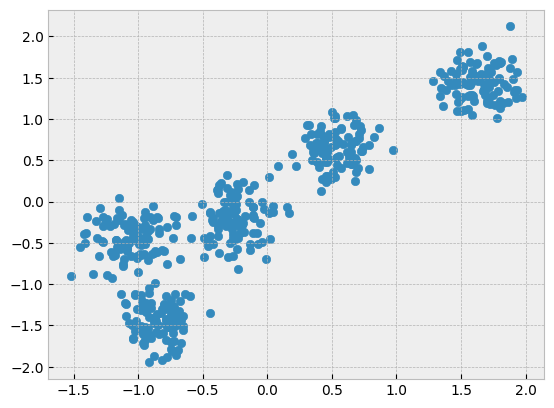

In [39]:
#Data Normalization

def normalise(X):
  u = X.mean(axis=0)
  std = X.std(axis=0)
  return (X-u)/std

X = normalise(X)



plt.scatter(X[:,0], X[:,1])
plt.show()

In [78]:
# Initializing the K-Centres for K clusters

k = 5
colors = ["green", "red", "blue", "yellow", "orange"]
n_features = 2

def init(k):
    centroids = {}
    for i in range (k):
      # center = np.random.random((2,))
      center = 2*(2*np.random.random((n_features,)) -1)
      # print(center)

      centroids[i] = {
          'center': center,
          'points': [],
          'color' : colors[i]
      }
    return centroids

centroids = init(k)


In [50]:
print(centroids)

{0: {'center': array([-0.52869243,  0.39922783]), 'points': [], 'color': 'green'}, 1: {'center': array([ 0.59957995, -1.15513851]), 'points': [], 'color': 'red'}, 2: {'center': array([-0.20868898,  1.25845387]), 'points': [], 'color': 'blue'}, 3: {'center': array([-1.5855998 , -0.01010326]), 'points': [], 'color': 'yellow'}, 4: {'center': array([0.16952187, 0.58493625]), 'points': [], 'color': 'orange'}}


In [52]:
def distance(p,q):
  return np.sqrt(np.sum(np.power(p-q,2)))


def assignPtsToCluster(X,centroids):
  m = X.shape[0]
  for i in range(m) :
    cdist = []
    cx = X[i]
    for kx in range(k):
      d = distance(centroids[kx]['center'],cx)
      cdist.append(d)

    clusterId = np.argmin(cdist)
    centroids[clusterId]['points'].append(cx)

In [56]:
# assignPtsToCluster(X,centroids)

In [55]:
# centroids

In [57]:
def updateClusters(centroids):
  for kx in range(k):
    pts = np.array(centroids[kx]['points'])

    if pts.shape[0] > 0:
      newCenter = pts.mean(axis = 0)
      centroids[kx]['center'] = newCenter
      centroids[kx]['points'] = []



In [67]:
def plotClusters(centroids):
  for kx in range(k):
    pts = np.array(centroids[kx]['points'])
    if(pts.shape[0]>0):
      plt.scatter(pts[:,0], pts[:,1], color = centroids[kx]['color'])

      uk = centroids[kx]['center']
      plt.scatter(uk[0],uk[1],color = 'black',marker = '*')

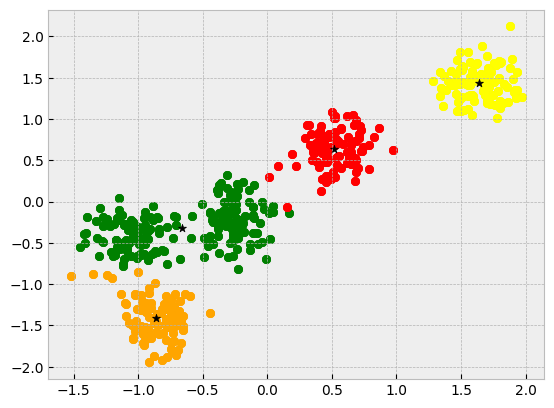

In [101]:
centroid = init(k)
assignPtsToCluster(X,centroids)
plotClusters(centroids)

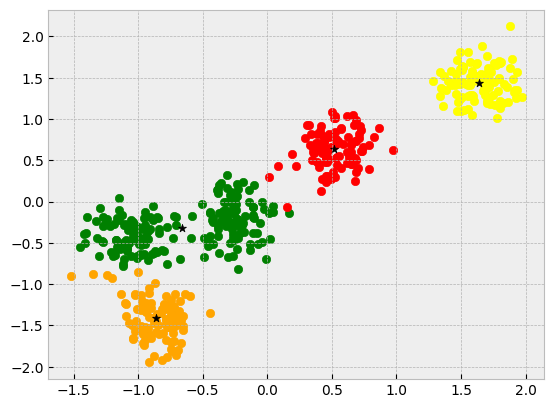

In [99]:
assignPtsToCluster(X,centroids)
plotClusters(centroids)
updateClusters(centroids)